In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from pathlib import Path
import h5py

from lib_lt.tools import recursive_read_attrs
from pprint import pprint

In [9]:
root = Path('/home/carmelo/lense_thirring/code/bh3')

h51 = root / 'run/0020/bh_0000.h5'
h52 = root / 'run/0023/bh_0000.h5'


In [38]:
pprint(recursive_read_attrs(h52, 'configure'))

{'build_dir': 'build',
 'continue': {'init_filename': 'init_continue.h5',
              'output_filename': 'continue.h5',
              'runtime': 50},
 'dt': 1e-05,
 'excite': {'breakpoint_filename': 'excite_br.h5',
            'globals': {'Ue': 0.75, 'cx': 15, 'cy': 0, 'sx': 5, 'sy': 1},
            'init_filename': 'groundstate.h5',
            'output_filename': 'excite.h5',
            'runtime': 0.2},
 'globals': {'Gamma': 500,
             'Lambda': 1,
             'U0': 10000,
             'alpha': 0.0065,
             'nu': 0,
             'radius': 50,
             'sigma': 3},
 'groundstate': {'output_filename': 'groundstate.h5', 'runtime': 15},
 'h5filepath': '{sequence_index:04d}/bh_{run_number:04d}.h5',
 'imprint_pair': {'breakpoint_filename': 'imprint_pair_br.h5',
                  'globals': {'dv': 0.3, 'xv': 35},
                  'init_filename': 'groundstate.h5',
                  'output_filename': 'imprint_pair.h5',
                  'runtime': 3},
 'realtime': {'i

In [14]:
with h5py.File(h51, 'r') as f:
    g = f[f"realtime/1"]
    x = g['x'][:]
    n1 = g['psiR'][:]**2 + g['psiI'][:]**2
    
with h5py.File(h52, 'r') as f:
    g = f[f"realtime/1"]
    n2 = g['psiR'][:]**2 + g['psiI'][:]**2


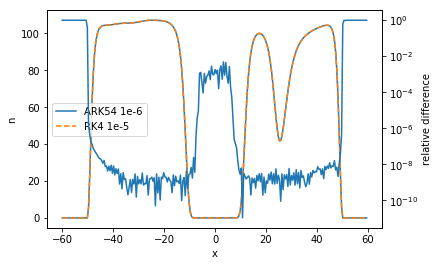

In [28]:
ix = -1


n1x = n1[ix, :, len(x) // 2]
n2x = n2[ix, :, len(x) // 2]

fig, ax = plt.subplots()
ax.plot(x, n1x, label='ARK54 1e-6')
ax.plot(x, n2x, '--', label='RK4 1e-5')

ax1 = ax.twinx()
ax1.semilogy(x, abs((n1x - n2x) / n1x))

ax.set(xlabel='x', ylabel='n')
ax1.set_ylabel('relative difference')
ax.legend()

In [2]:
%matplotlib notebook

True Kerr metric

<IPython.core.display.Javascript object>


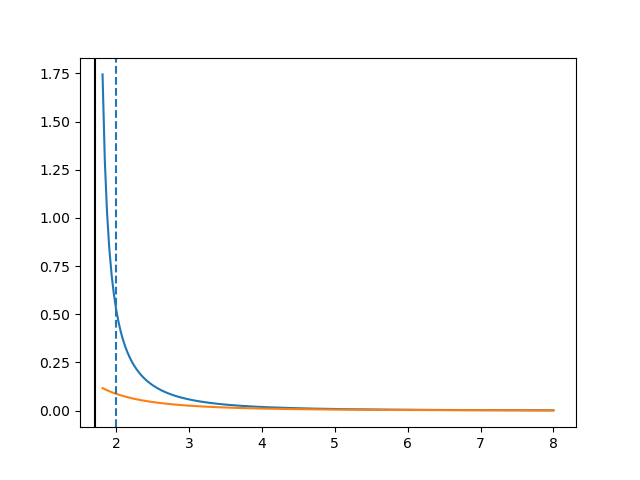

In [3]:
a = 0.7

r_e = 2
r_h = 1 + np.sqrt(1 - a**2)

def omega_LT(r, a):
    return a * (r**2 - a**2) / (r**2 + a**2)**(3/2) / (r**2 + a**2 - 2*r)

r = np.linspace(r_h + 0.1, 8, 200)
omega = omega_LT(r, a)

fig, ax = plt.subplots()

ax.plot(r, omega)
ax.plot(r, a / r**3)

ax.axvline(r_h, color='k')
ax.axvline(r_e, ls='--')

Draining Bathtub

<IPython.core.display.Javascript object>


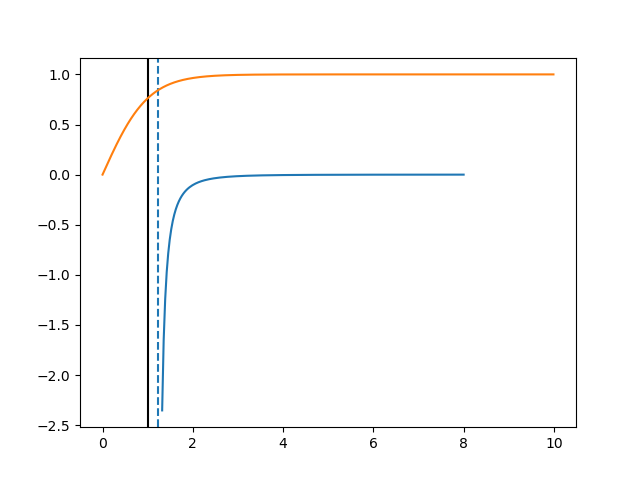

In [4]:
A = 1
B = 0.7

r_h = A
r_e = np.sqrt(A**2 + B**2)

def omega_LT_DB(r, A, B):
    r_e = np.sqrt(A**2 + B**2)
    return -B * r_e**2 / r**4 / (1 - r_e**2 / r**2)

r = np.linspace(r_e + 1e-1, 8, 200)
omega = omega_LT_DB(r, A, B)

fig, ax = plt.subplots()

ax.plot(r, omega)

ax.axvline(r_h, color='k')
ax.axvline(r_e, ls='--')

In [6]:
import sympy

In [7]:
A, B, r = sympy.symbols('A B r')

In [8]:
M = sympy.Matrix(
    [
        [-(1 - (A**2 + B**2)/r**2), A/r, -B/r],
        [A/r, 1, 0],
        [-B/r, 0, 1]
    ]
)

In [9]:
M

Matrix([
[-1 + (A**2 + B**2)/r**2, A/r, -B/r],
[                    A/r,   1,    0],
[                   -B/r,   0,    1]])

In [10]:
P, D = M.diagonalize()

In [11]:
D

Matrix([
[1,                                                                 0,                                                                 0],
[0, (A**2 + B**2 - sqrt(A**4 + 2*A**2*B**2 + B**4 + 4*r**4))/(2*r**2),                                                                 0],
[0,                                                                 0, (A**2 + B**2 + sqrt(A**4 + 2*A**2*B**2 + B**4 + 4*r**4))/(2*r**2)]])

In [12]:
P

Matrix([
[  0, 2*r*(A**2 + B**2)/(B*(A**2 + B**2 - 2*r**2 + sqrt(A**4 + 2*A**2*B**2 + B**4 + 4*r**4))), 2*r*(A**2 + B**2)/(B*(A**2 + B**2 - 2*r**2 - sqrt(A**4 + 2*A**2*B**2 + B**4 + 4*r**4)))],
[B/A,                                                                                    -A/B,                                                                                    -A/B],
[  1,                                                                                       1,                                                                                       1]])

<IPython.core.display.Javascript object>


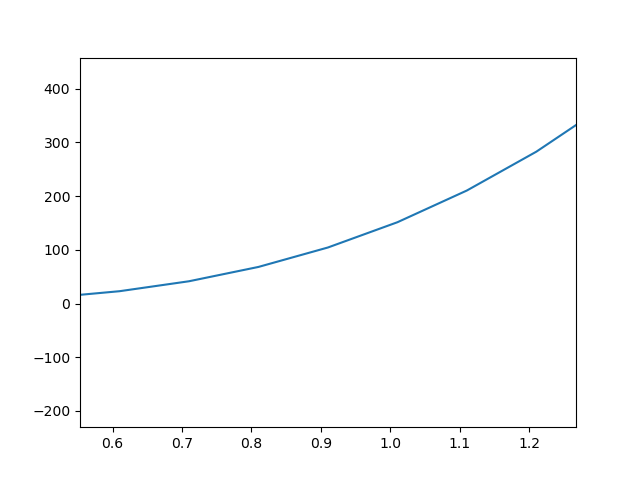

In [41]:
r = np.arange(1e-4, 10, 0.01).reshape(-1, 1)

alpha = 0.0065
sigma =  np.arange(0.01, 3, 0.1).reshape(1, -1)

psi = np.tanh(r)
pot = np.exp(-r**2/2/sigma**2)

zeta = 1 / alpha * np.trapz(psi**2 * pot * r**2, x=r, axis=0)

plt.figure()
plt.plot(sigma.ravel(), zeta)

In [43]:
1/0.005

200.0